In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df = df[["Hours_Studied", "Exam_Score"]]

In [5]:
df.head(5)

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70


In [7]:
print(df.head())
print(df.info())
print(df.describe())


   Hours_Studied  Exam_Score
0             23          67
1             19          61
2             24          74
3             29          71
4             19          70
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  6607 non-null   int64
 1   Exam_Score     6607 non-null   int64
dtypes: int64(2)
memory usage: 103.4 KB
None
       Hours_Studied   Exam_Score
count    6607.000000  6607.000000
mean       19.975329    67.235659
std         5.990594     3.890456
min         1.000000    55.000000
25%        16.000000    65.000000
50%        20.000000    67.000000
75%        24.000000    69.000000
max        44.000000   101.000000


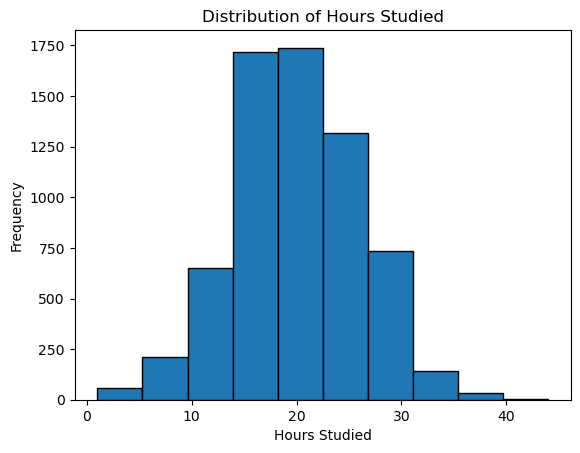

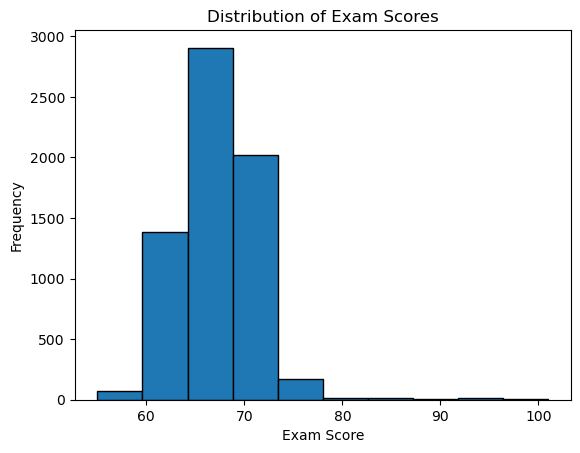

In [8]:
import matplotlib.pyplot as plt

plt.hist(df["Hours_Studied"], bins=10, edgecolor='black')
plt.xlabel("Hours Studied")
plt.ylabel("Frequency")
plt.title("Distribution of Hours Studied")
plt.show()

plt.hist(df["Exam_Score"], bins=10, edgecolor='black')
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.title("Distribution of Exam Scores")
plt.show()


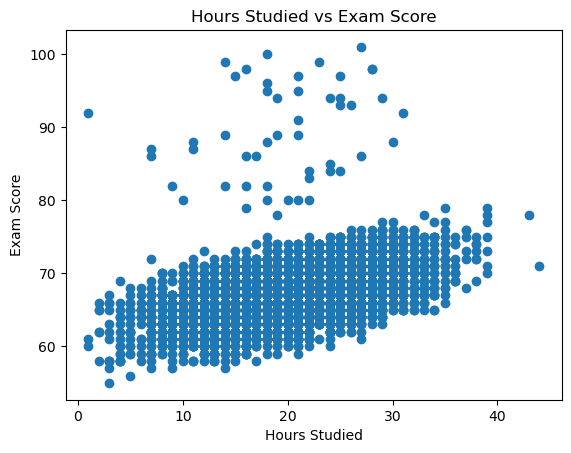

In [9]:
plt.scatter(df["Hours_Studied"], df["Exam_Score"])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()


In [11]:
correlation = df.corr()
print(correlation)


               Hours_Studied  Exam_Score
Hours_Studied       1.000000    0.445455
Exam_Score          0.445455    1.000000


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled, columns=["Hours_Studied", "Exam_Score"])

# Save to parquet
df_scaled.to_parquet("student_data_scaled.parquet", index=False)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df_scaled[["Hours_Studied"]]   # predictor
y = df_scaled["Exam_Score"]        # target

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Intercept: -0.004669335628534996
Coefficient: 0.439877911179678
RMSE: 0.8470
R² Score: 0.2320


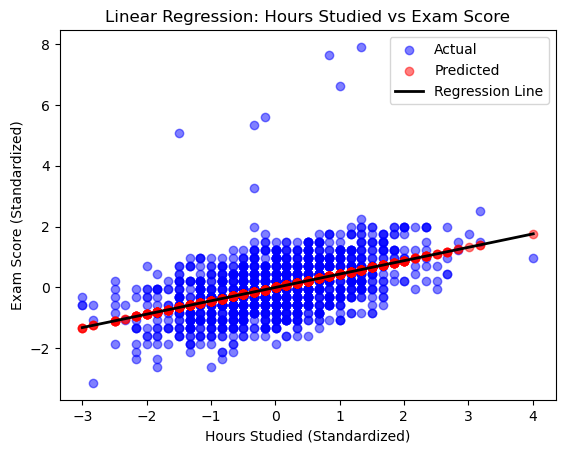

In [14]:

# Scatter plot of actual vs predicted
plt.scatter(X_test, y_test, color="blue", alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred, color="red", alpha=0.5, label="Predicted")

# Regression line (sorted for cleaner plotting)
sorted_idx = X_test.values.flatten().argsort()
plt.plot(X_test.values.flatten()[sorted_idx],
         y_pred[sorted_idx],
         color="black", linewidth=2, label="Regression Line")

plt.xlabel("Hours Studied (Standardized)")
plt.ylabel("Exam Score (Standardized)")
plt.title("Linear Regression: Hours Studied vs Exam Score")
plt.legend()
plt.show()


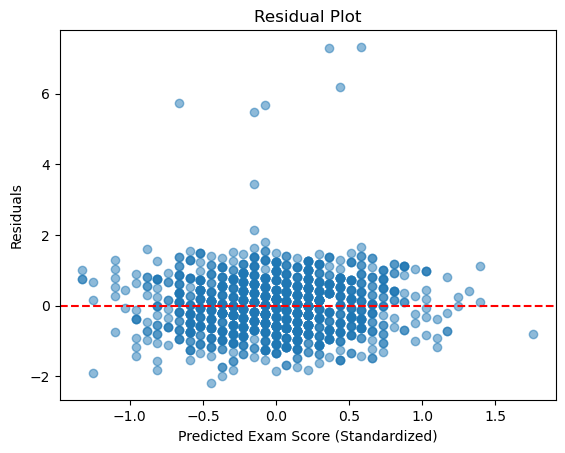

In [15]:

# Residuals
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Exam Score (Standardized)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
